In [1]:
import numpy as np
import matplotlib.pyplot as plt

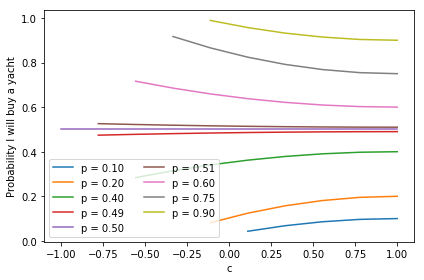

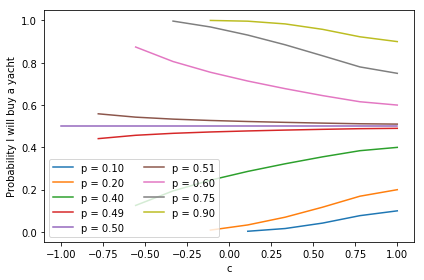

In [2]:
def buy_yacht_chain(p,c, P00, P11, chain):
    P10 = 1.-P00
    P01 = 1.-P11
    if chain[0] == 1:   prob = p+0.
    else: prob = 1.-p
    for k in xrange(1,len(chain)):
        prev, cur = chain[k-1], chain[k]
        if prev == 1 and cur == 1:
            prob *= P11
        elif prev == 1 and cur == -1:
            prob *= P01
        elif prev == -1 and cur == 1:
            prob *= P10
        elif prev == -1 and cur == -1:
            prob *= P00
    return prob
    
    
def buy_yacht(p,c,m):
    

    P11 = c+p-c*p
    P00 = c*p-p+1.
    
    if( P11 > 1) or ( P11 < 0) or ( P00 > 1) or( P00  < 0):
        return None
    
    
    P10 = 1.-P00
    P01 = 1.-P11

    prob = 0.
    for y in xrange(2**m):

        chain = []
        while y > 0:
            chain.append(y%2)
            y/=2
        while len(chain) < m:
            chain.append(0)
        chain = 2.*np.array(chain)-1
     
        if np.sum(chain) < 0: continue
        prob +=   buy_yacht_chain(p,c,P00, P11, chain)
    return prob

c_list = np.linspace(-1,1,10)
prob3 = c_list*0.
prob9 = c_list*0.
legendstring = []
for p in [.1,.2,.4,.49,0.5,0.51, .6,0.75,0.9]:
    legendstring.append('p = %.2f' % p)
    for k in xrange(len(c_list)):
        prob3[k] = buy_yacht(p,c_list[k],3)
        prob9[k] = buy_yacht(p,c_list[k],9)
    plt.figure(1)
    plt.plot(c_list,prob3)
    plt.figure(2)
    plt.plot(c_list,prob9)
plt.figure(1)
plt.legend(legendstring,ncol=2)
plt.xlabel('c')
plt.ylabel('Probability I will buy a yacht')
plt.tight_layout()
plt.savefig('sequential_soln/yacht3.png')

plt.figure(2)
plt.legend(legendstring,ncol=2)
plt.xlabel('c')
plt.ylabel('Probability I will buy a yacht')
plt.tight_layout()
plt.savefig('sequential_soln/yacht9.png')

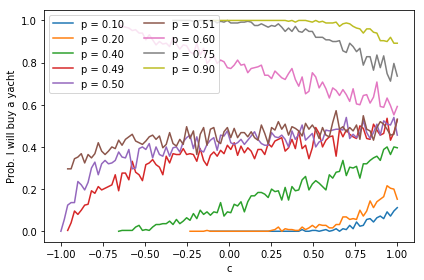

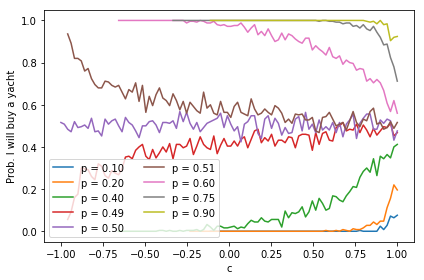

In [14]:
def buy_yacht_chain(p,c, P00, P11, chain):
    P10 = 1.-P00
    P01 = 1.-P11
    if chain[0] == 1:   prob = p+0.
    else: prob = 1.-p
    for k in xrange(1,len(chain)):
        prev, cur = chain[k-1], chain[k]
        if prev == 1 and cur == 1:
            prob *= P11
        elif prev == 1 and cur == -1:
            prob *= P01
        elif prev == -1 and cur == 1:
            prob *= P10
        elif prev == -1 and cur == -1:
            prob *= P00
    return prob
    
def gen_bool_rv(p):
    return np.less(np.random.rand() , p)*1.

def buy_yacht_1stream(p,c,m, P11, P10):
    
    y = [gen_bool_rv(p)] 
    for k in xrange(m):
        y_cur = y[-1]
        if y_cur == 1.:
            y_next = gen_bool_rv(P11)
        else:
            y_next = gen_bool_rv(P10)
        y.append(y_next)
    return np.round(np.mean(np.array(y)))

def buy_yacht_sample(p,c,m, ntrials):
    
    
    P11 = c+p-c*p
    P00 = c*p-p+1.
    
    if( P11 > 1) or ( P11 < 0) or ( P00 > 1) or( P00  < 0):
        return None
    
    P10 = 1.-P00
    P01 = 1.-P11

    prob  = 0.
    for trial in xrange(ntrials):
        prob += buy_yacht_1stream(p,c,m, P11, P10)
    return prob / (ntrials + 0.)

c_list = np.linspace(-1,1,100)
prob100 = c_list*0.
prob25 = c_list*0.
for p in [.1,.2,.4,.49,0.5,0.51, .6,0.75,0.9]:
    for k in xrange(len(c_list)):
        prob25[k] = buy_yacht_sample(p,c_list[k],m=25, ntrials=250)
        prob100[k] = buy_yacht_sample(p,c_list[k],m=100, ntrials=250)
    plt.figure(1)
    plt.plot(c_list,prob25)
    plt.figure(2)
    plt.plot(c_list,prob100)
    
plt.figure(1)
plt.legend(legendstring,ncol=2)
plt.xlabel('c')
plt.ylabel('Prob. I will buy a yacht')
plt.tight_layout()
plt.savefig('sequential_soln/yacht25.png')

plt.figure(2)
plt.legend(legendstring,ncol=2)
plt.xlabel('c')
plt.ylabel('Prob. I will buy a yacht')  
plt.tight_layout()
plt.savefig('sequential_soln/yacht100.png') 